# Imports:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Sequence


# Methods:

In [8]:
def getGaussianNumbers(n: int, sigma: float) -> np.ndarray:
    """
    the function to generate random numbers with gaussian distribution with size n

    1- create to list of uniform random numbers with size n/2
    2- calculate rho and theta in circular coordination
    3- transform results into normal coordination

    :param n:the amount of random numbers
    :type n:int
    :param sigma:the std of numbers
    :type sigma:float
    :return:the random generated numbers
    :rtype:np.ndarray
    """
    np.random.uniform(0,1,n)
    x1,x2 = np.random.uniform(0,1,round(n /2)), np.random.uniform(0,1,round(n /2))

    rho = sigma * np.sqrt(2 * np.log(1/(1 - x1)))
    theta = 2*np.pi * x2

    y1 = list(rho*np.sin(theta))
    y2 = list(rho*np.cos(theta))

    return np.array(y1 + y2)

In [9]:
def getRandomCorrelatingNumber(n: int, correlatingNumber: int) -> np.ndarray:
    """
    the function to get random correlating numbers
    while the generated numbers are not enough: check for the input correlatingNumber in random outputs and get the number after it

    :param n:the amount of random numbers
    :type n:int
    :param correlatingNumber:the input correlatingNumber
    :type correlatingNumber:int
    :return:the random generated numbers
    :rtype:np.ndarray
    """
    numbers = []
    while len(numbers)<n:
        if np.floor(np.random.uniform(0,10,1))== correlatingNumber :
            numbers.append(np.floor(np.random.uniform(0,10,1)))
    return np.array(numbers)

In [10]:
def generate(n: int) -> Sequence:
    """
    the function to generate uniform random numbers and count the results and return the counts and the relative error of the counts

    :param n:the amount of random numbers
    :type n: int
    :return: the counts and the relative error of the counts
    :rtype: Sequence
    """
    rns = list(np.floor(np.random.uniform(0,10,n)))
    counts = []
    for i in range(10):
        counts.append(rns.count(i))

    relativeError = np.std(counts)/n

    return counts,relativeError

In [11]:
def correlationCheckingGenerate(n: int, cn: int) -> Sequence:
    """
    the function to generate correlating random numbers and count the results and return the counts and the relative error of the counts

    :param n:the amount of random numbers
    :type n: int
    :param cn:the input correlatingNumber
    :type cn:int
    :return: the counts and the relative error of the counts
    :rtype: Sequence
    """
    rns = getRandomCorrelatingNumber(n,cn)
    counts = []
    for i in range(10):
        counts.append(list(rns).count(i))

    relativeError = np.std(counts)/n

    return counts,relativeError

In [12]:
def getCentralLimitPlot(n: int, iterations: int) -> None:
    """
    the function to check the central limit theorem
    for range iteration,repeat getting n random number and calculate sum of them.then coun the values in sums and plot the bar plot of the counts

    :param n:the amount of random numbers
    :type n:int
    :param iterations:the number of repeats
    :type iterations:int
    """
    sums = []
    for i in range(iterations):
        sums.append(sum(np.floor(np.random.uniform(0,10,n))))
    counts = []
    for i in range(n*9 +1 ):
        counts.append(sums.count(i))

    plt.figure(figsize=(10,10))
    plt.title("counts of numbers in summation of random numbers with n={0} and {1} iterations".format(n,iterations))
    plt.xlabel("sum(x)")
    plt.ylabel("counts")
    plt.bar(range(n*9 +1),counts)

    plt.show()




# Q6.1:

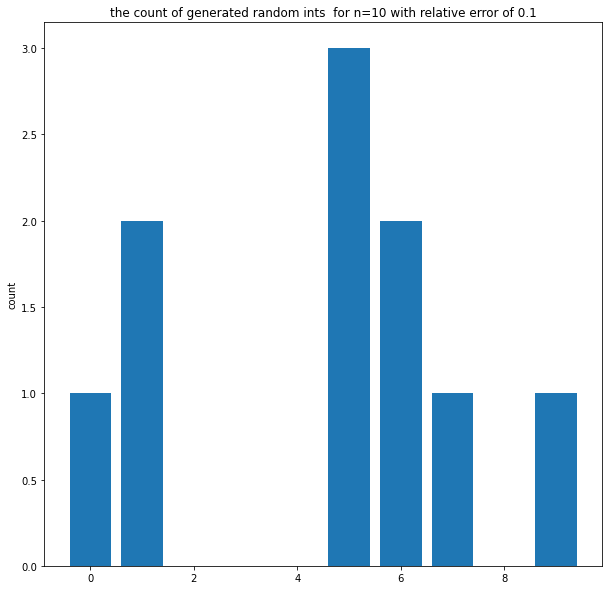

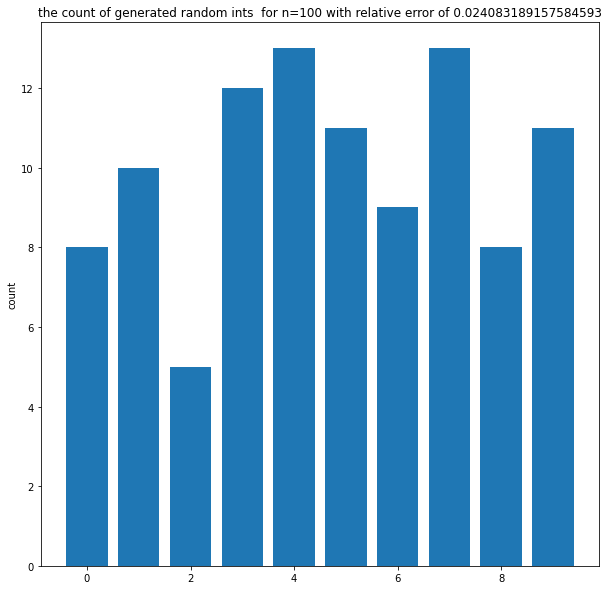

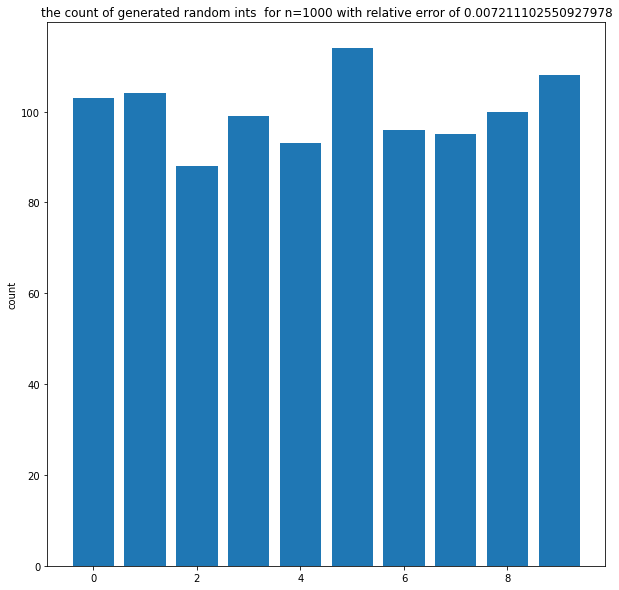

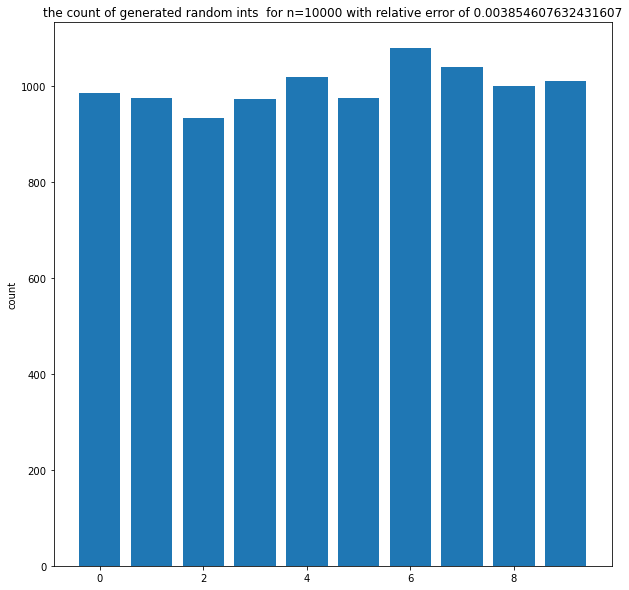

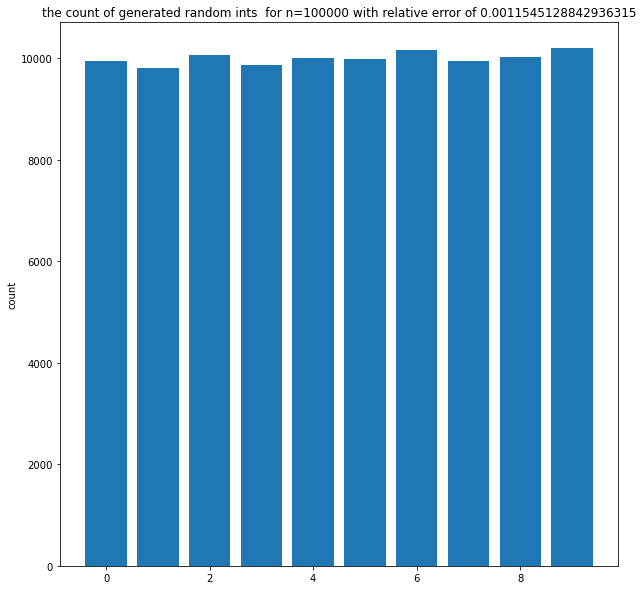

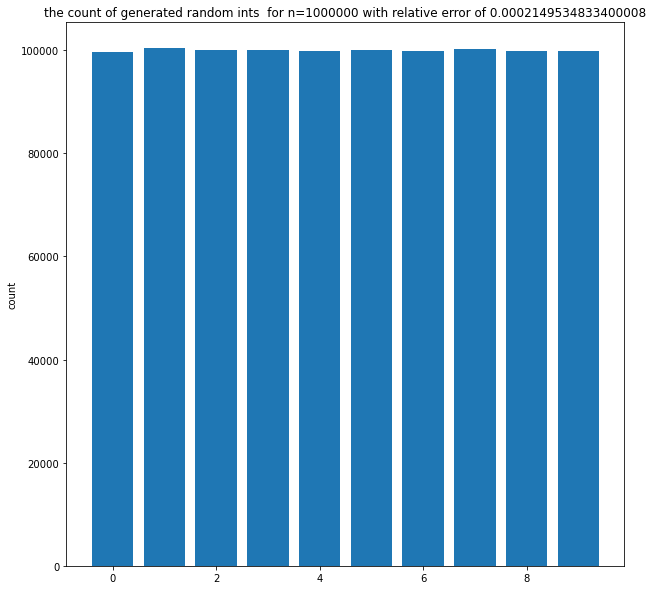

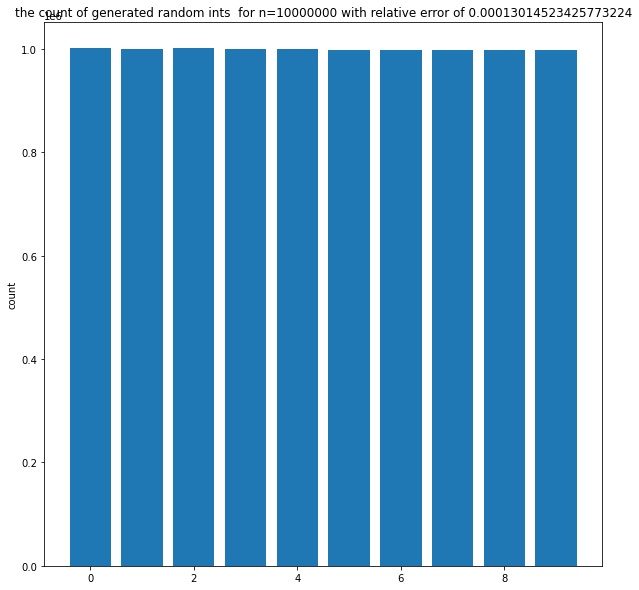

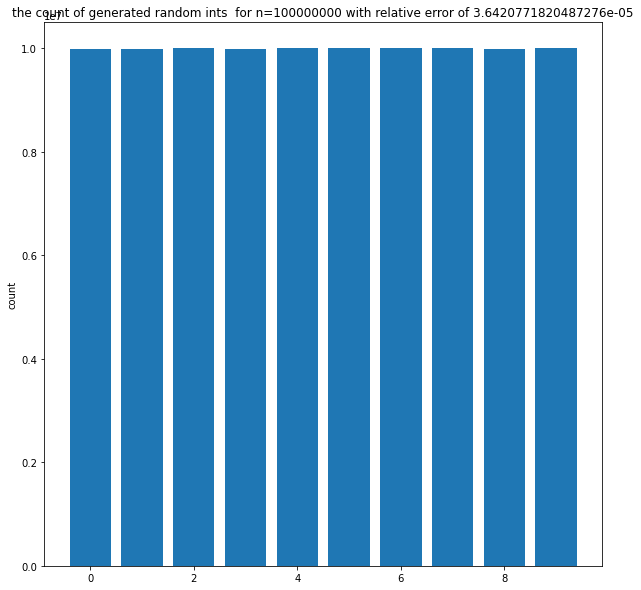

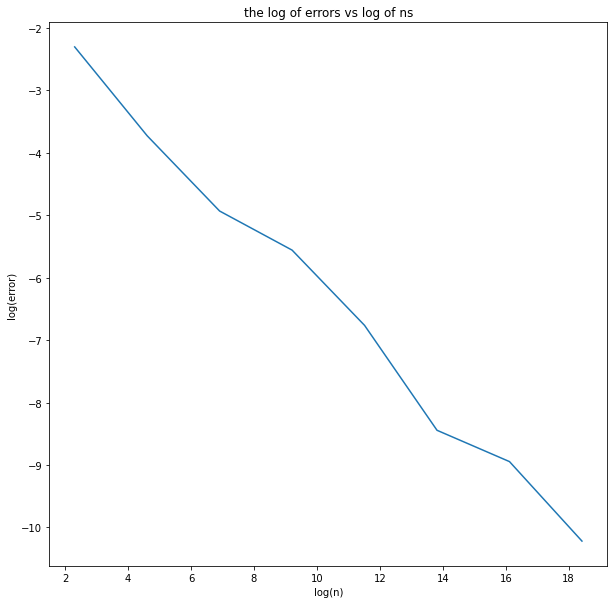

r2 for log(error) and log(n):  -0.9961419246715381
slope:  -0.4822325900958022


In [13]:
res = []
ns = []
for i in range(1,9):
    counts,re = generate(10**i)

    plt.figure(figsize=(10,10))
    plt.title("the count of generated random ints  for n={0} with relative error of {1}".format(10**i,re))
    plt.bar(range(10),counts)
    plt.ylabel("count")
    plt.show()
    res.append(re)
    ns.append(10**i)

plt.figure(figsize=(10,10))
plt.title("the log of errors vs log of ns")
plt.xlabel("log(n)")
plt.ylabel("log(error)")
plt.plot(np.log(ns),np.log(res))
plt.show()


print("r2 for log(error) and log(n): ",np.corrcoef(np.log(ns), np.log(res))[0][1])
print("slope: ",np.polyfit(np.log(ns),np.log(res),1)[0])
# the slope should be -0.5

# Q6.2:

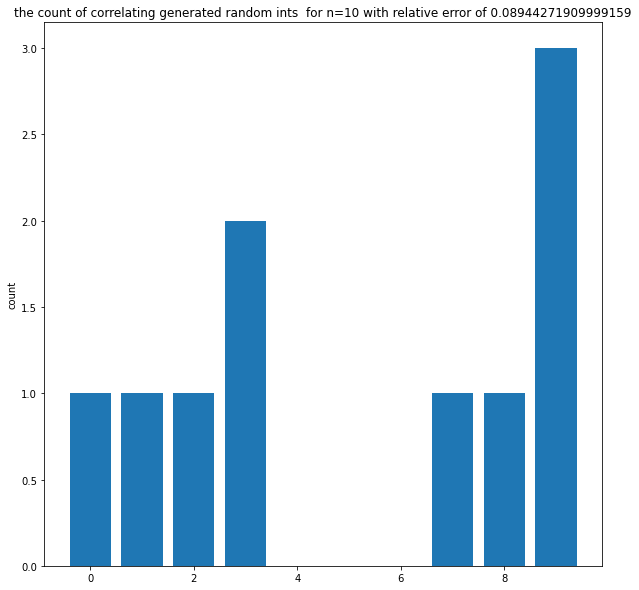

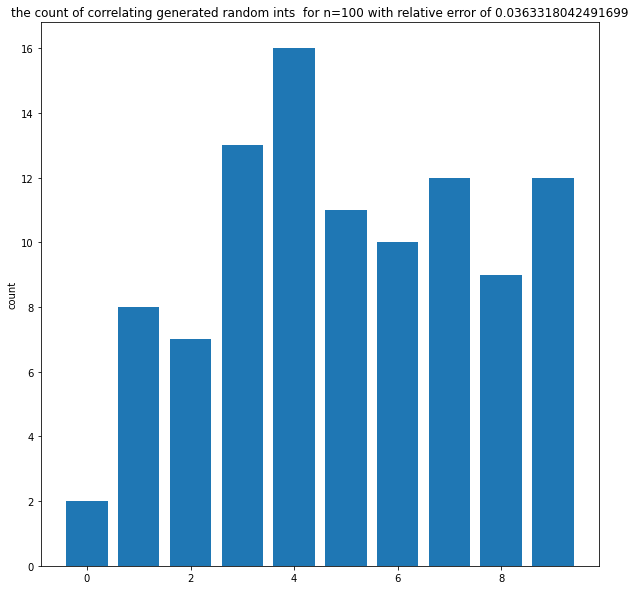

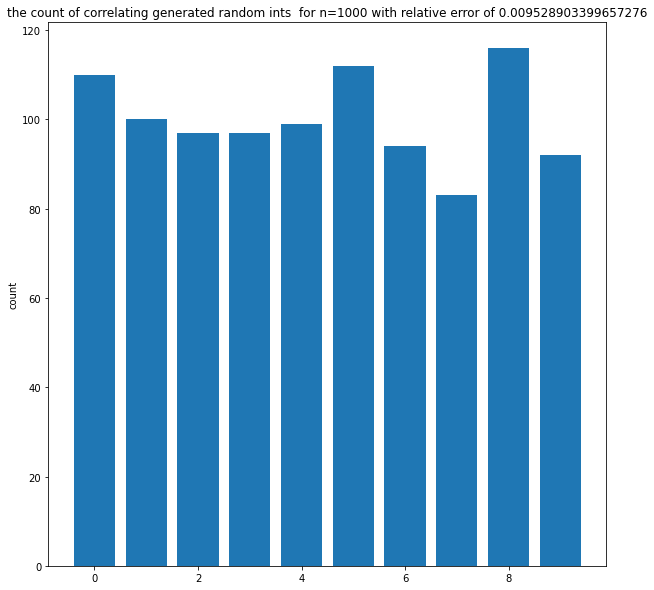

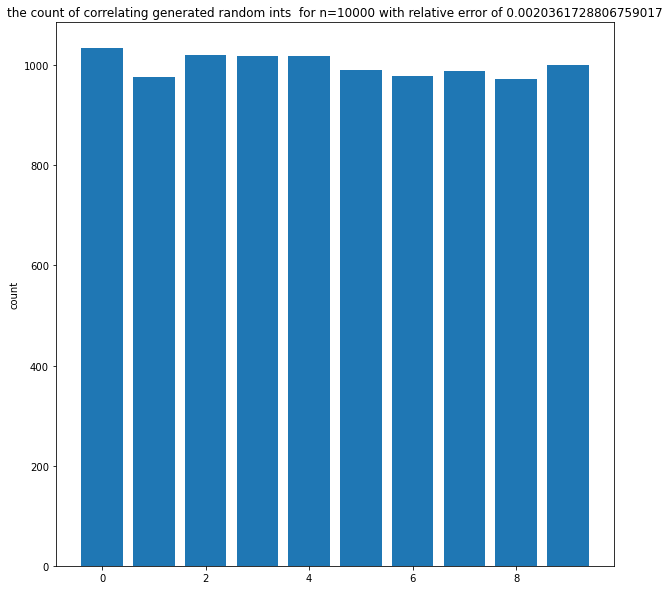

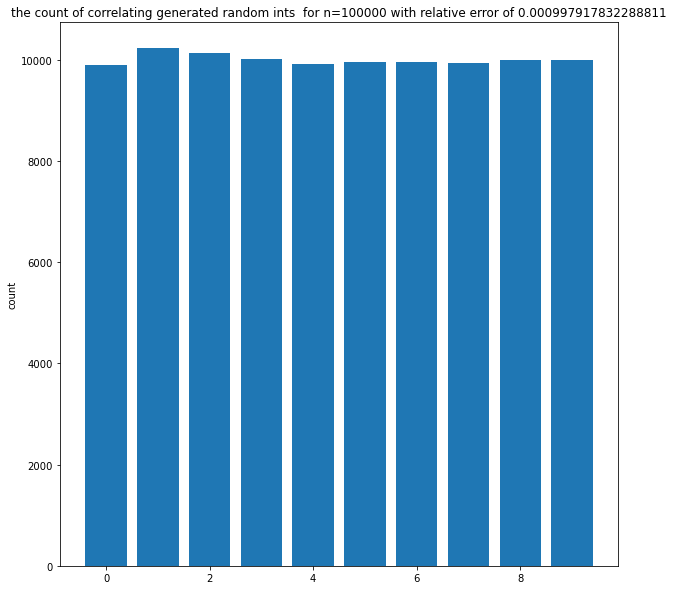

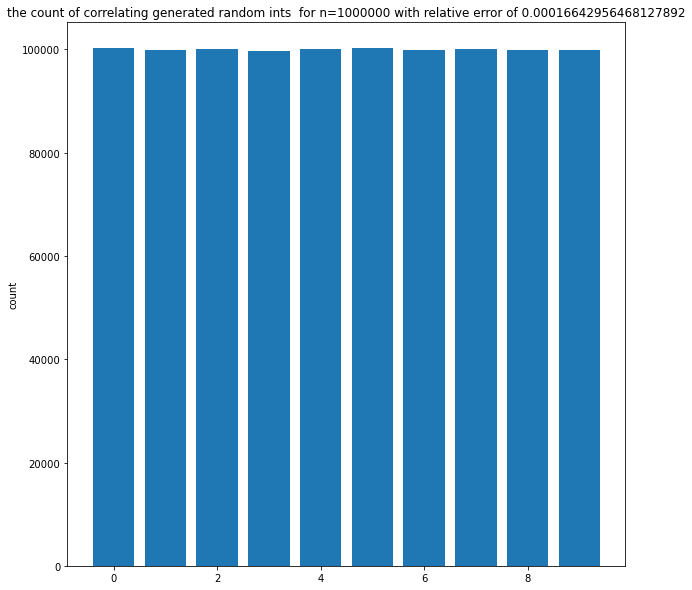

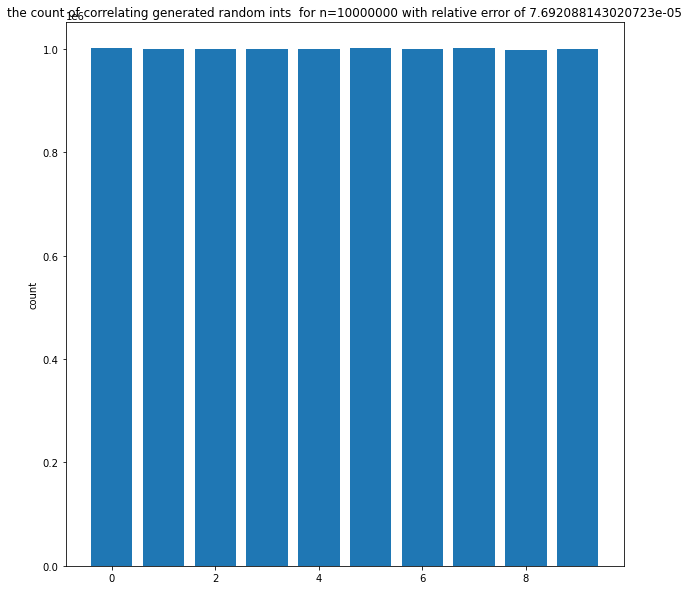

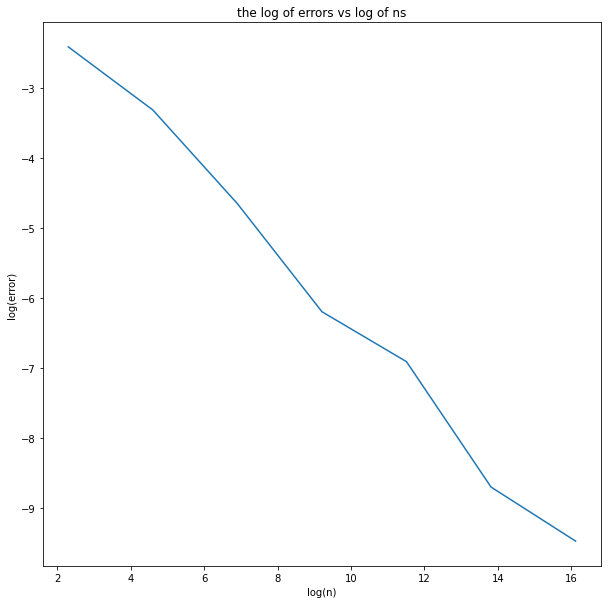

r2 for log(error) and log(n):  -0.9963907358409865
slope:  -0.5305201193485106


In [14]:
res = []
ns = []
for i in range(1,8):
    counts,re = correlationCheckingGenerate(10**i,4)

    plt.figure(figsize=(10,10))
    plt.title("the count of correlating generated random ints  for n={0} with relative error of {1}".format(10**i,re))
    plt.bar(range(10),counts)
    plt.ylabel("count")
    plt.show()
    res.append(re)
    ns.append(10**i)

plt.figure(figsize=(10,10))
plt.title("the log of errors vs log of ns")
plt.xlabel("log(n)")
plt.ylabel("log(error)")
plt.plot(np.log(ns),np.log(res))
plt.show()


print("r2 for log(error) and log(n): ",np.corrcoef(np.log(ns), np.log(res))[0][1])
print("slope: ",np.polyfit(np.log(ns),np.log(res),1)[0])
# the slope should be -0.5

# Q6.3:

if $X_1, X_2, \dots, X_n$ are n random samples from a population with overall mean $\mu$ and finite
    variance $\sigma ^{2}$, and if $\bar{X}_{n}$ is the sample mean, then the limiting form of the distribution

$$ Z=\lim _{n\to\infty}\frac{\sqrt{n}}{\sigma}(\bar{X}_{n}-\mu) $$

is a standard normal distribution, which is
    \begin{equation}
        \mathcal{N}(0, 1) = \frac{e^{-{x^2}/{2}}}{\sqrt{2\pi}}.
        \end{equation}

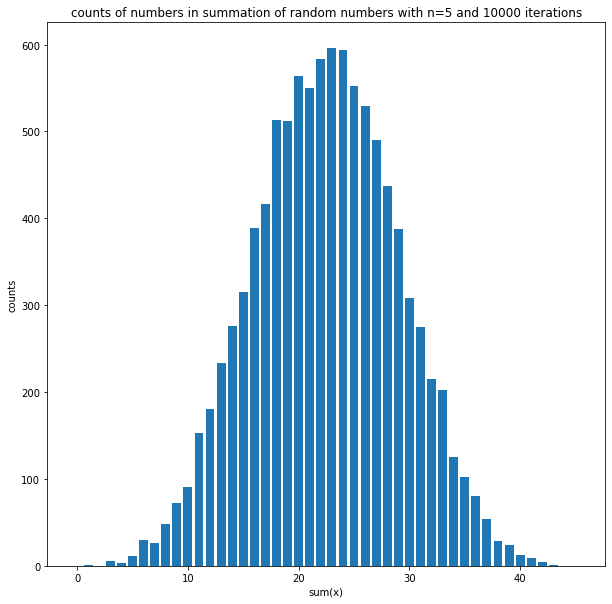

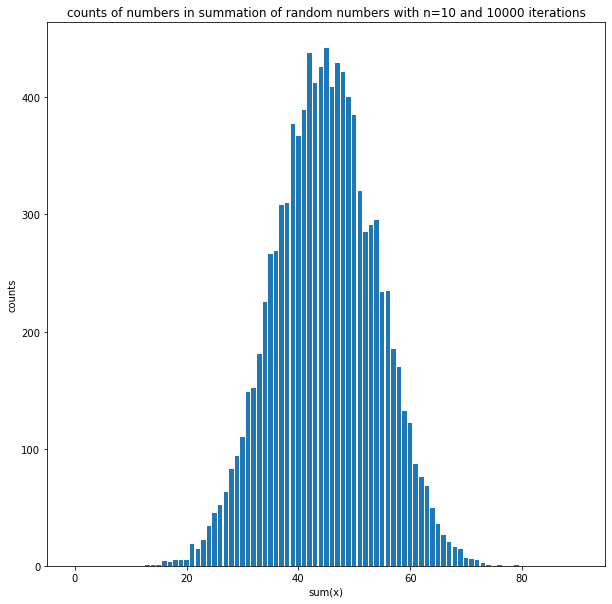

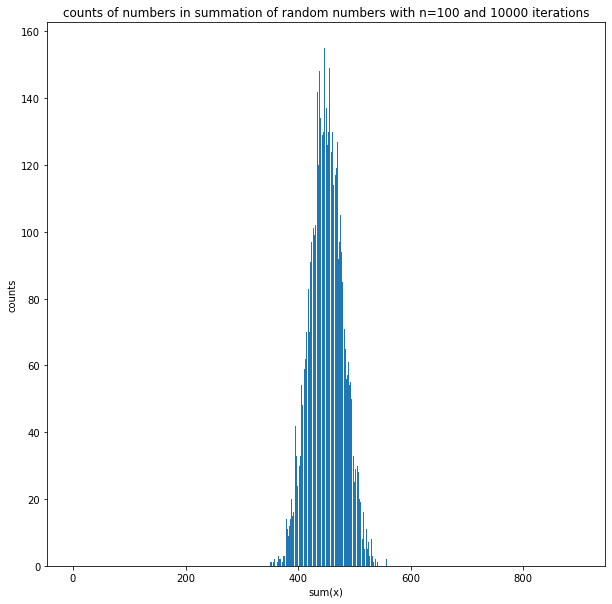

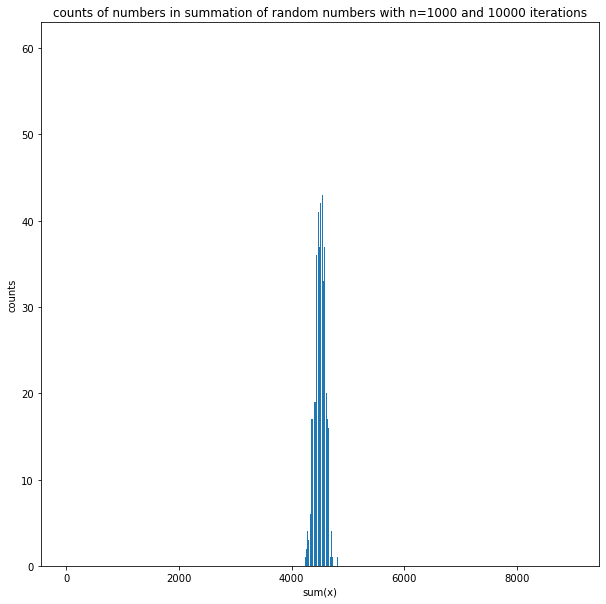

In [15]:
ns = [5,10,100,1000]
for n in ns:
    getCentralLimitPlot(n,10000)

# Q6.4:

  \begin{equation}
        f(x)d{x} = g(y)d{y} \implies \int_{-\infty}^x f(x)d{x} = \int_{-\infty}^y g(y)d{y}.
    \end{equation}


If $x$ is generated by an RNG, then


\begin{equation}
        x = \int_{-\infty}^y g(y)d{y} = G(y)
\end{equation}


since $G(y)$ is monotonically increasing ($g(y) > 0$, because it is a probability density function),
it is invertible and


\begin{equation}
        y = G^{-1}(x).
\end{equation}

For a gaussian (normal) distribution

\begin{equation}
        g(y) = d\frac{e^{-\frac{y^2}{2\sigma^2}}}{\sqrt{2\pi\sigma^2}}.
\end{equation}


In this form, $G(y)$ cannot be expressed in elementary functions. to solve this issue, we can generate two random
numbers $y_1$ and $y_2$ from $x$ instead of one:


\begin{equation}
        g(y_1, y_2)d{y_1}d{y_2} = g(y_1)g(y_2)d{y_1}d{y_2}
        = \frac{e^{-\frac{y_1^2 + y_2^2}{2\sigma^2}}}{2\pi\sigma^2}d{y_1}d{y_2}
\end{equation}


With a change of coordinates to polar coordinates


$$y_1 = \rho\sin{\theta} $$


$$ y_2 = \rho\cos{\theta}$$

$$ g(y_1, y_2)d{y_1}d{y_2} = g(\rho, \theta)\rho d{\rho} d{\theta}
        = \frac{e^{-\frac{\rho^2}{2\sigma^2}}}{2\pi\sigma^2}\rho d{\rho} d{\theta} $$

For normalized distributions in terms of $\rho$ and $\theta$, we can use

\begin{empheq}
        g_1(\rho) &= \frac{e^{-\frac{\rho^2}{2\sigma^2}}}{\sigma^2}\rho \\
        g_2(\theta) &= \frac{1}{2\pi}
\end{empheq}


Now, two random numbers with gaussian distribution $y_1$ and $y_2$ can be generated from two random numbers form RNG
    $x_1$ and $x_2$:

\begin{empheq}
        G_1(\rho) &= \int_0^\rho \frac{e^{-\frac{\rho^2}{2\sigma^2}}}{\sigma^2}\rho d{\rho}
        = 1-e^{-\frac{\rho^2}{2\sigma^2}} \\
        G_2(\theta) &= \int_0^\theta \frac{1}{2\pi} d{\theta} = \frac{\theta}{2\pi}
\end{empheq}

\begin{empheq}
        \rho &= G_1^{-1}(x_1) = \sigma\sqrt{2\ln(\frac{1}{1-x_1})} \\
        \theta &= G_2^{-1}(x_2) = 2\pi x_2
\end{empheq}

\begin{empheq}
        y_1 &= \sigma\sin(2\pi x_2)\sqrt{2\ln(\frac{1}{1-x_1})} \\
        y_2 &= \sigma\cos(2\pi x_2)\sqrt{2\ln(\frac{1}{1-x_1})}
\end{empheq}

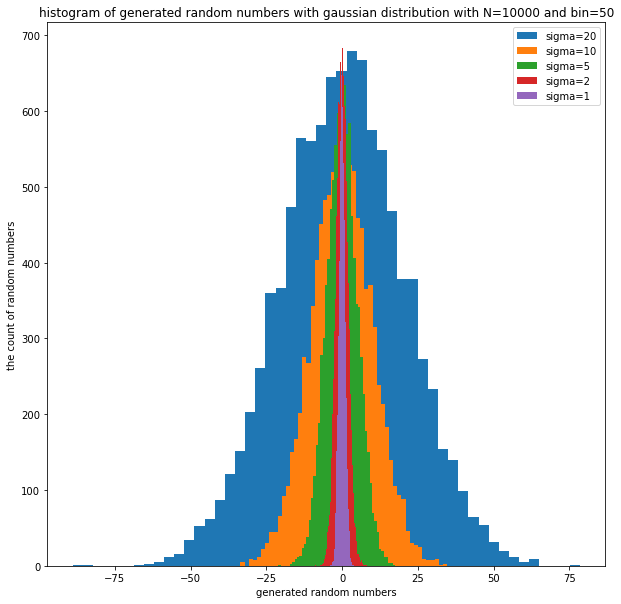

In [16]:
plt.figure(figsize=(10,10))
plt.title("histogram of generated random numbers with gaussian distribution with N=10000 and bin=50")
plt.xlabel("generated random numbers")
plt.ylabel("the count of random numbers")

plt.hist(getGaussianNumbers(10000, 20), bins=50)
plt.hist(getGaussianNumbers(10000, 10), bins=50)
plt.hist(getGaussianNumbers(10000, 5), bins=50)
plt.hist(getGaussianNumbers(10000, 2), bins=50)
plt.hist(getGaussianNumbers(10000, 1), bins=50)

plt.legend(["sigma=20","sigma=10","sigma=5","sigma=2","sigma=1"])
plt.show()